# Initialize

## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define functions

In [2]:
def Likelihood(a, b, x):
    n = len(x)
    return 1/(2*np.pi*b)**(n/2)*np.exp(-(np.sum((x-a)**2))/(2*b))

# Main

## Data

In [3]:
x_0 = 100
x_n = 50

noise = np.random.normal(0,1,x_n)
# Noise amplitude, uniform for the whole data: sigma_i = sigma
sigma = 5

x = x_0+noise*sigma

## Histogram

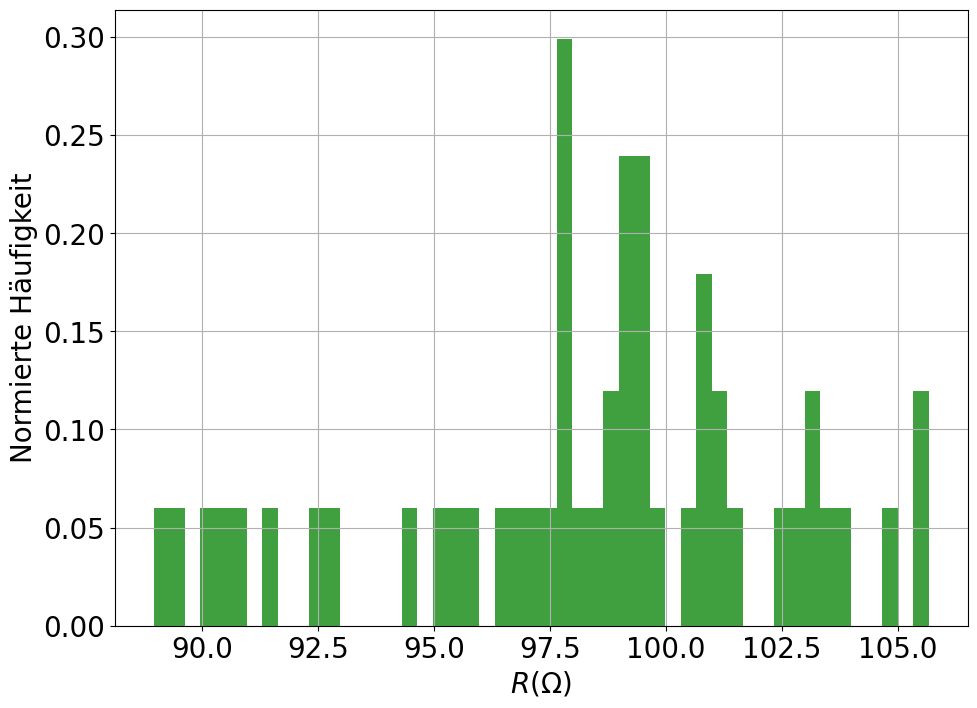

In [4]:
# Number of bins
nbins = 50

# Plot the histogram
plt.figure(
    num=1,
    figsize=(11,8),
    facecolor='white')


n, bins, patches = plt.hist(x, nbins, density=True, facecolor='g', alpha=0.75)


plt.xlabel(r'$R(\Omega)$', fontsize=20)
plt.ylabel('Normierte Häufigkeit', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.grid(True)

plt.show()

In [5]:
# Define range of values of a0 and a1 for which the Likelihood function will be evaluated

# a0 = mean
a0_min = 90
a0_max = 110
a0_n = 101

a0 = np.linspace(a0_min, a0_max, a0_n)

# a1 = variance
a1_min = 0.1
a1_max = 100
a1_n = 201

a1 = np.linspace(a1_min, a1_max, a1_n)

In [6]:
# Define 2d-Array for the results of the Likelihood function
L = np.zeros([a1_n,a0_n])
L_max = 0
i_max = 0
j_max = 0

# Iterate though all values of a0 and a1 and calculate the Likelihood
for i, a0_i in enumerate(a0):
    for j, a1_j in enumerate(a1):
        Lji = Likelihood(a0_i, a1_j, x)
        if Lji > L_max:
            L_max = Lji
            i_max = i
            j_max = j
        L[j,i] = Lji

In [7]:
print('Maximally likely a0: {:0.2f}'.format(a0[i_max]))
print('Maximally likely a1: {:0.2f}**2'.format(np.sqrt(a1[j_max])))

Maximally likely a0: 98.40
Maximally likely a1: 4.19**2


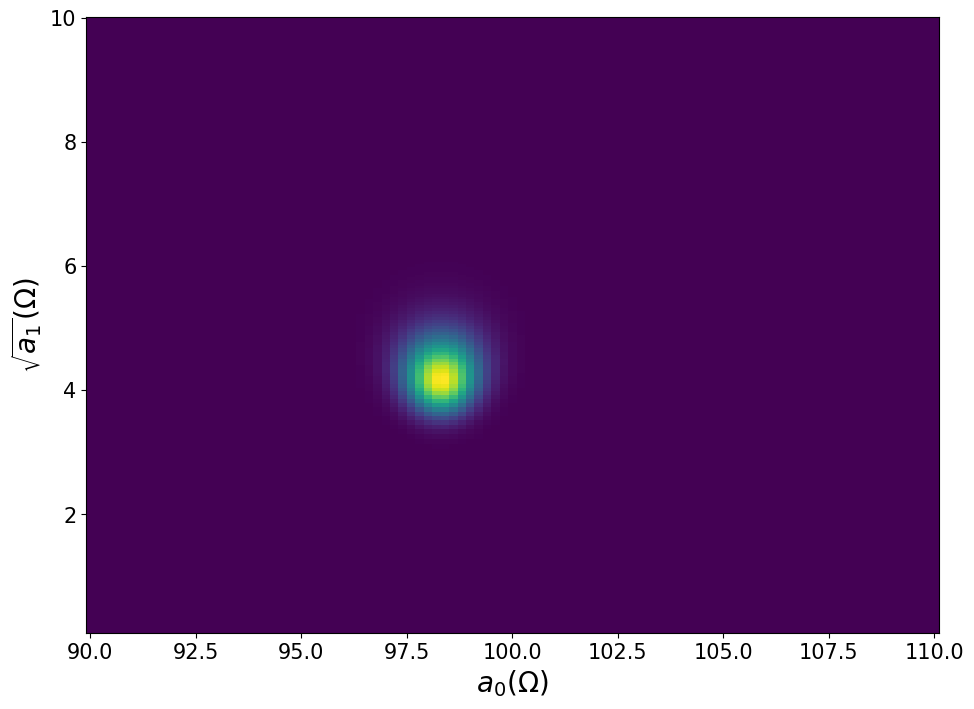

In [8]:
# plot data
plt.figure(
    num=1,
    figsize=(11,8),
    facecolor='white')
plt.xlabel(r'$a_0(\Omega)$', fontsize=20)
plt.ylabel(r'$\sqrt{a_1} (\Omega)$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Plot 2d-Array
plt.pcolormesh(a0, np.sqrt(a1), L, shading='nearest')
# The shading='nearest' argument is needed when we use only 1d-Arrays as axis scales
plt.show()

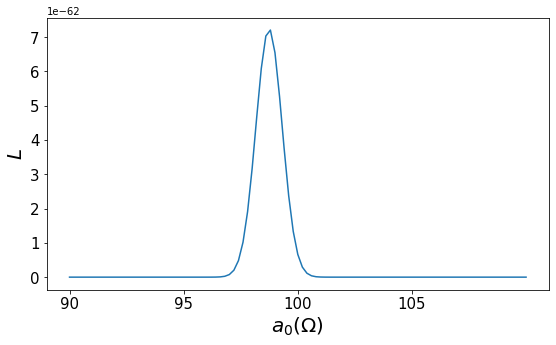

In [9]:
# Plot Linecut for a0
plt.figure(
    num=1,
    figsize=(9, 5),
    facecolor='white')
plt.xlabel(r'$a_0(\Omega)$', fontsize=20)
plt.ylabel(r'$L$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(a0_min,a0_max, 5.0))
plt.plot(a0, L[j_max,:])

plt.show()

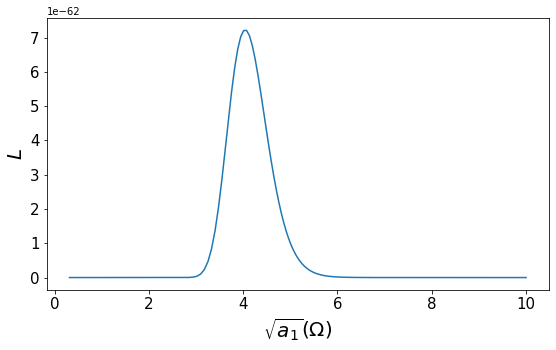

In [10]:
# Plot Linecut for a1
plt.figure(
    num=1,
    figsize=(9, 5),
    facecolor='white')
plt.xlabel(r'$\sqrt{a_1}(\Omega)$', fontsize=20)
plt.ylabel(r'$L$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(a1_min-0.1,a1_max, 2.0))
plt.plot(np.sqrt(a1), L[:,i_max])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


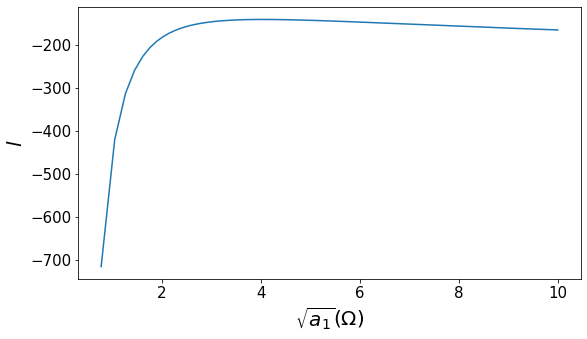

In [11]:
# Plot Log-Likelihood for a1
plt.figure(
    num=1,
    figsize=(9, 5),
    facecolor='white')
plt.xlabel(r'$\sqrt{a_1}(\Omega)$', fontsize=20)
plt.ylabel(r'$l$', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(np.sqrt(a1), np.log(L[:,i_max]))

plt.show()